<a href="https://colab.research.google.com/github/gbagolin/ttr-project/blob/master/three_class_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O three_classes.zip "https://www.dropbox.com/s/yoaiztoj69p5g6m/three_classes.zip?dl=0"

In [ ]:
!unzip three_classes.zip

In [6]:
from sklearn.svm import SVC
from upload_dataset import upload_dataset
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA


import numpy as np
import cv2


In [8]:
#Parameters initialization

NUM_CLASSES = 3

#Dataset initialization
labels = []
features = []
class_list = range(3)

for i in class_list: 

  print("Iteration: ", i)
  tmp_dataset, tmp_labels = upload_dataset('three_classes/{0}/'.format(i), i)
  labels.append(tmp_labels)

  for img in tmp_dataset: 
    features.append(img.reshape(120000))

Iteration:  0
Iteration:  1
Iteration:  2


In [18]:
X = np.array(features)

In [19]:
#Labels Declaration 
y = [] 
for label_list in labels:
  for element in label_list: 
    y.append(element)

In [20]:
from sklearn.model_selection import train_test_split
random_state = 0
# Split into train/test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.1, stratify=y,
                     random_state=random_state)

y_train = np.array(y_train)
y_test = np.array(y_test)

print("N Elements train: ", X_train.shape[0])
print("N Elements test: ", X_test.shape[0])

N Elements train:  2629
N Elements test:  293


In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.preprocessing import StandardScaler
#PCA model initialization
model = make_pipeline(StandardScaler(),
                    PCA(n_components=100,
                        random_state=random_state))
#PCA model training
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=100,
                     random_state=0, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

In [22]:
#PCA data transformation
X_train = model.transform(X_train)
X_test = model.transform(X_test)

In [25]:
from sklearn import svm
kernel = 'rbf'
max_iteration = 10000
classifier = svm.SVC(kernel=kernel, max_iter=max_iteration, C = 5).fit(X_train, y_train)

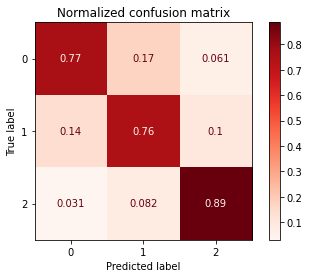

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_list,
                                 cmap=plt.cm.Reds,
                                 normalize='true')

disp.ax_.set_title("Normalized confusion matrix")

plt.show()